# Read in all dataset and Data Exploration Analysis 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType
spark = SparkSession.builder.appName('EDA').getOrCreate()

In [3]:
#%cd home/g593697882qq/archive

In [4]:
#df = pd.read_csv("amazon_reviews_us_Baby_v1_00.tsv", sep='\t', error_bad_lines=False)
#df.shape

## Read in all 12 (21.78GB) dataset by Pyspark and form into one dataset called `data`

In [2]:
schema = StructType([ \
    StructField("marketplace",       StringType(),    True), \
    StructField("customer_id",       StringType(),    True), \
    StructField("review_id",         StringType(),    True), \
    StructField("product_id",        StringType(),    True), \
    StructField("product_parent",    StringType(),    True), \
    StructField("product_title",     StringType(),    True), \
    StructField("product_category",  StringType(),    True), \
    StructField("star_rating",       IntegerType(),   True), \
    StructField("helpful_votes",     IntegerType(),   True), \
    StructField("total_votes",       IntegerType(),   True), \
    StructField("vine",              StringType(),    True), \
    StructField("verified_purchase", StringType(),    True), \
    StructField("review_headline",   StringType(),    True), \
    StructField("review_body",       StringType(),    True), \
    StructField("review_date",       TimestampType(), True), \
  ])

path = ['archive/amazon_reviews_us_Apparel_v1_00.tsv',
        'archive/amazon_reviews_us_Automotive_v1_00.tsv',
        'archive/amazon_reviews_us_Baby_v1_00.tsv',
        'archive/amazon_reviews_us_Beauty_v1_00.tsv',
        'archive/amazon_reviews_us_Books_v1_02.tsv',
        'archive/amazon_reviews_us_Camera_v1_00.tsv',
        'archive/amazon_reviews_us_Electronics_v1_00.tsv',
        'archive/amazon_reviews_us_Furniture_v1_00.tsv',
        'archive/amazon_reviews_us_Sports_v1_00.tsv',
        'archive/amazon_reviews_us_Grocery_v1_00.tsv',
        'archive/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv',
        'archive/amazon_reviews_us_Music_v1_00.tsv']

data = spark.read.csv(path, schema=schema, header=True, sep='\t', mode='DROPMALFORMED')

In [3]:
data.printSchema()

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: timestamp (nullable = true)



### There are in total *37,173,725* records in this huge data (big data)

In [4]:
data.count()

37173725

In [ ]:
data.show()

## Data Exploration Analysis

### Count reviews by each product category

#### We observe that there are some dates and reviews apprearing in the product_category column.

In [7]:
df_count = data.groupBy('product_category').count()
df_count.show(df_count.count())

+--------------------+-------+
|    product_category|  count|
+--------------------+-------+
|          2014-01-09|      1|
|              Sports|4849563|
|                null|   1315|
|          2012-12-15|      1|
|                Baby|1752932|
|          2012-07-29|      1|
|Installed this in...|      1|
|          2011-09-09|      1|
|             Apparel|5906322|
|             Grocery|2402431|
|          2003-02-05|      1|
|I don't get this ...|      1|
|         Electronics|3093861|
|          2013-05-18|      1|
|          2013-09-23|      1|
|          Automotive|3514709|
|               Books|3105515|
|          2013-06-10|      1|
|          2002-08-07|      1|
|          2014-04-29|      1|
|               Music|4751540|
|           Furniture| 792113|
|Personal_Care_App...|  85981|
|          2012-10-07|      1|
|          2005-03-11|      1|
|          2011-05-17|      1|
|          2013-06-26|      1|
|              Camera|1801972|
|          2011-05-04|      1|
|       

#### We filter out dates and reviews in the product_category column and count each product category

In [8]:
product_category = ['Sports', 'Baby', 'Apparel', 'Grocery', 'Electronics', 'Automotive', 'Books', 'Music', 'Furniture', 'Personal_Care_Appliances', 'Camera', 'Beauty']
data_filter = data.filter(data.product_category.isin(product_category))
df_filter_count = data_filter.groupBy('product_category').count()
df_filter_count.show(df_filter_count.count())

+--------------------+-------+
|    product_category|  count|
+--------------------+-------+
|              Sports|4849563|
|                Baby|1752932|
|             Apparel|5906322|
|             Grocery|2402431|
|         Electronics|3093861|
|          Automotive|3514709|
|               Books|3105515|
|               Music|4751540|
|           Furniture| 792113|
|Personal_Care_App...|  85981|
|              Camera|1801972|
|              Beauty|5115452|
+--------------------+-------+



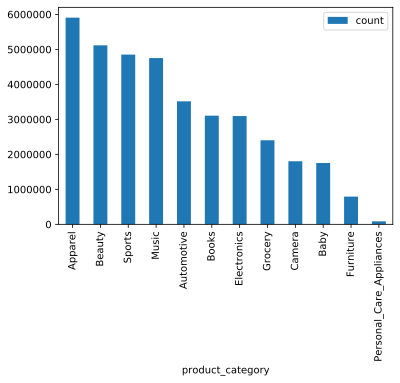

In [11]:
df_filter_count.toPandas().sort_values('count', ascending=False).plot.bar(x = 'product_category', y = 'count');

### Which customers post the most reviews over this 20 years.

In [12]:
customer_count = data_filter.groupBy('customer_id').count()
customer_count.sort(col('count').desc()).show()

+-----------+-----+
|customer_id|count|
+-----------+-----+
|   50122160|22331|
|   50732546| 9964|
|   50736950| 7943|
|   38214553| 5412|
|   51184997| 5371|
|   18116317| 4302|
|   23267387| 4051|
|   50345651| 3842|
|   52496677| 3003|
|   14539589| 2913|
|   15725862| 2852|
|   50913245| 2851|
|   50881246| 2802|
|   20018062| 2717|
|   22073263| 2682|
|   52615377| 2678|
|   19380211| 2592|
|   51381678| 2458|
|   37455882| 2371|
|   50441674| 2366|
+-----------+-----+
only showing top 20 rows



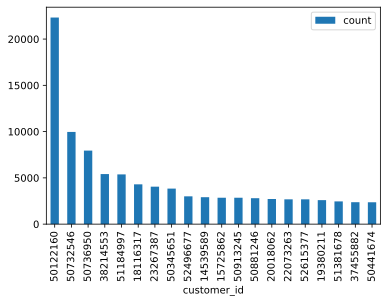

In [16]:
top20 = customer_count.sort(col('count').desc()).head(20)
top20_l = list(map(lambda x : x[0], top20))
d20 = data_filter.filter(data_filter.customer_id.isin(top20_l)).groupBy('customer_id').count()

d20.toPandas().sort_values('count', ascending=False).plot.bar(x = 'customer_id', y = 'count');

### How many customers show up in this data?

In [17]:
customer_count.count()

13863467

In [ ]:
customer_count.toPandas().sort_values('count', ascending=False).head(20).plot.bar(x = 'customer_id', y = 'count');

## The average rating of each product category and the top 20 customers

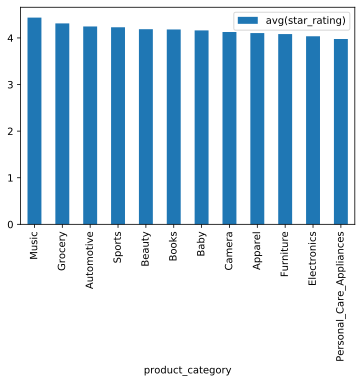

In [18]:
data_filter.groupBy('product_category').mean('star_rating').toPandas().sort_values('avg(star_rating)', ascending=False).plot.bar(x = 'product_category', y = 'avg(star_rating)');




In [15]:
top20 = customer_count.sort(col('count').desc()).head(20)

In [24]:
top20_l = list(map(lambda x : x[0], top20))

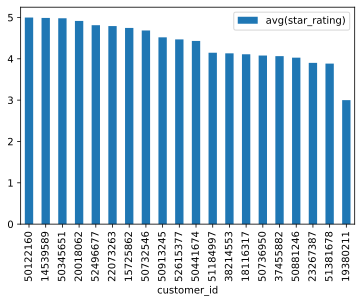

In [19]:
c20 = data_filter.filter(data_filter.customer_id.isin(top20_l)).groupBy('customer_id').mean('star_rating')
c20.toPandas().sort_values('avg(star_rating)', ascending=False).plot.bar(x = 'customer_id', y = 'avg(star_rating)');


## Rating Distributions for Vine users

In [20]:
# test = [data.filter(data['vine']==0), data.filter(data['vine']==1)]
# fig, ax = plt.subplots()
# plt.boxplot(test);
# ax.set_xticklabels(['With WLB', 'Without WLB'])
# plt.xlabel('Work Life Balance')
# plt.ylabel('Rating')
# plt.title('Rating for Work Life Balance');
data.groupBy('vine').mean().select('vine', 'avg(star_rating)').show()
data.groupBy('vine').min().select('vine', 'min(star_rating)').show()
data.groupBy('vine').max().select('vine', 'max(star_rating)').show()

+----+------------------+
|vine|  avg(star_rating)|
+----+------------------+
|null|              null|
|   Y|4.0882250065023005|
|   N| 4.205815094790487|
+----+------------------+

+----+----------------+
|vine|min(star_rating)|
+----+----------------+
|null|            null|
|   Y|               1|
|   N|               1|
+----+----------------+

+----+----------------+
|vine|max(star_rating)|
+----+----------------+
|null|            null|
|   Y|               5|
|   N|               5|
+----+----------------+



In [21]:
vine_no = data.filter(data['vine']==0)
vine_yes = data.filter(data['vine']==1)
vine_no.select('star_rating').describe().show()
vine_yes.select('star_rating').describe().show()

+-------+-----------+
|summary|star_rating|
+-------+-----------+
|  count|          0|
|   mean|       null|
| stddev|       null|
|    min|       null|
|    max|       null|
+-------+-----------+

+-------+-----------+
|summary|star_rating|
+-------+-----------+
|  count|          0|
|   mean|       null|
| stddev|       null|
|    min|       null|
|    max|       null|
+-------+-----------+

